In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import openpyxl
train=pd.read_excel(r'/Users/cchauhan/Desktop/Data Exercise 2/archive/train.xlsx')
test=pd.read_excel(r'/Users/cchauhan/Desktop/Data Exercise 2/archive/test.xlsx')


In [3]:
##Exploratory data analysis(EDA)
round(train.isnull().sum()/len(train)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

In [4]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
# Extract Experience Year from Experience column And convert it into Numeric

train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)


In [6]:
train['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int64

In [7]:
train['Place'].fillna('Unknown', inplace=True)
train['locality']=train['Place'].str.split(',').str[0]
train['state']=train['Place'].str.split(',').str[-1]

In [8]:
train.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,locality,state
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [9]:
# Fill the missing Values in Ratingcolumn with -1% to provide importance to missing value.
train['Rating'].fillna('-1%',inplace=True)

# Now, Extract the actual value of Rating except '%' sign
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [10]:
train['Rating']

0       100
1        98
2        -1
3        -1
4       100
       ... 
5956     98
5957     -1
5958     97
5959     90
5960    100
Name: Rating, Length: 5961, dtype: int64

In [11]:
bins = [-1,0,10,20,30,40,50,60,70,80,90,100]   #bins takes 1 fewer value then labels
labels = [i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [12]:
train['Rating']

0       10
1       10
2        0
3        0
4       10
        ..
5956    10
5957     0
5958    10
5959     9
5960    10
Name: Rating, Length: 5961, dtype: category
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

In [13]:
# Dict of each Qualification with their counts
train['Qualification'] = train['Qualification'].str.split(",") #to take each qual in a list
Qualification = {}

for x in train['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:    #if value is there already in dict keys
            Qualification[qual] += 1   #inc its count by 1
        else:
            Qualification[qual] = 1     #else include it in a dict with count of 1

#print(Qualification)            

In [14]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,locality,state
0,"[BHMS, MD - Homeopathy]",24,10,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"[BAMS, MD - Ayurveda Medicine]",12,10,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"[MBBS, MS - Otorhinolaryngology]",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"[BSc - Zoology, BAMS]",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,[BAMS],20,10,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [15]:
# Now, Extract Top 10 Qual from Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
most_qual
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])

print(final_qual)

# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    train[qual] = 0
    
for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train[c][y] = 1
            
#drop the qualification, now it's of no use
train.drop('Qualification', axis=1, inplace=True)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [16]:
train.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,locality,state,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


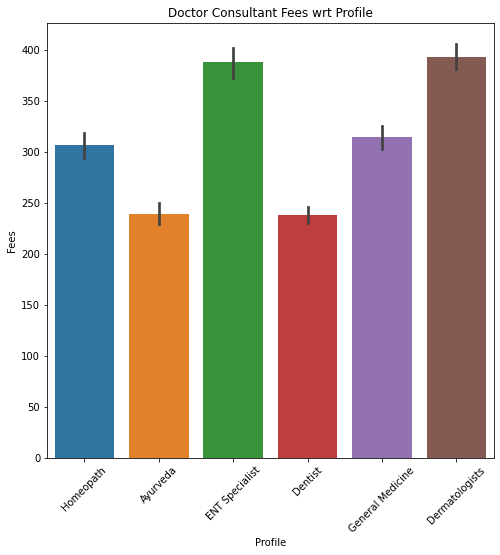

In [17]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=train)
plt.title("Doctor Consultant Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

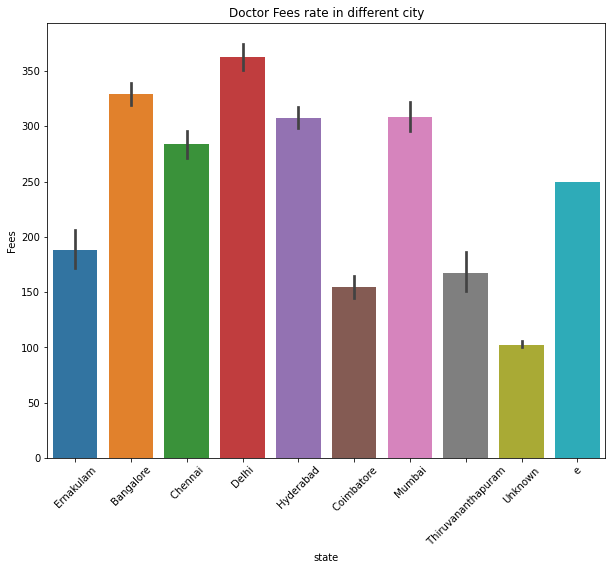

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x='state',y='Fees',data=train)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

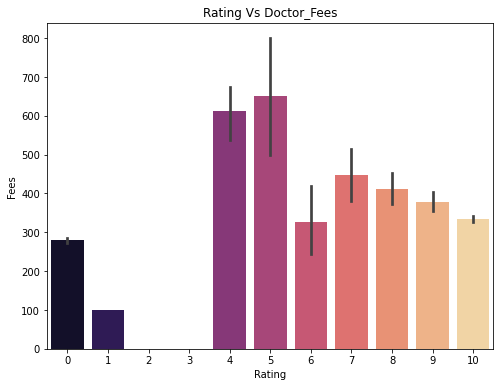

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='Rating',y='Fees',data=train,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

In [20]:
# encode Profile and state
train = pd.get_dummies(train, columns=['state','Profile'], prefix=['state','Profile'])

In [21]:
#change the name of some columns to use it in correct way.
train.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)

In [22]:
train.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

In [23]:
train.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD_Dermatology,MS_ENT,...,state_ Mumbai,state_ Thiruvananthapuram,state_Unknown,state_e,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT_Specialist,Profile_General_Medicine,Profile_Homeopath
0,24,10,"Kakkanad, Ernakulam",100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,"Whitefield, Bangalore",350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,"Mathikere - BEL, Bangalore",300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,"Bannerghatta Road, Bangalore",250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,"Keelkattalai, Chennai",250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
train.drop(['Place'], axis=1, inplace=True)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

# calculate RMSLE (SCORE func).
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = score, greater_is_better=True)

In [26]:
x = train.drop('Fees',axis=1)    #Independent Variables
y = train['Fees']                # Dependent Variables(Target)
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
# object of algo we have imported
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg =  RandomForestRegressor()
#apply models
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train,y_train)    
    y_pred = reg.predict(x_test)    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.783328807236496
SVR() 0.7753241999570056
DecisionTreeRegressor() 0.6670904650585837
RandomForestRegressor() 0.7639649169492551


In [28]:
from sklearn.model_selection import RandomizedSearchCV
# hyperparameter tuning of RandomForest

#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5,10]
#max_features
max_features=['auto','sqrt']

# generate a dictionary of all the Hyper Parameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }
#fit the data
# increase the n_iter for more accuracy.
rf_random = RandomizedSearchCV(rf_reg, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=20, random_state=42, verbose=1, n_jobs=-1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [30]:
y_pred1=rf_random.predict(x_test)
print(score(y_pred1,y_test))

0.7939598572671864
